In [23]:
from sklearn.cluster import KMeans as KM
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as SS
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.model_selection import train_test_split as TTS
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
#reading in CSV and viewing
df = pd.read_csv('crypto_data.csv')

#making df into Pandas DataFrame
df = pd.DataFrame(df)

#print to check
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
#drop all rows that have value FALSE in IsTrading column

df = df[df.IsTrading != False]

df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [4]:
#drop column IsTrading

df = df.drop('IsTrading',1)

df


,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
#drop all rows that have NA 

df = df.dropna()

df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
#dropping crypto that has not been mined (TotalCoinsMined > 0)
df = df[df.TotalCoinsMined > 0]

df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
#creating coin_name df 

coin_name = df['CoinName']
coin_name

0           42 Coin
2           404Coin
5         EliteCoin
7           Bitcoin
8          Ethereum
           ...     
1238         ZEPHYR
1242        Gapcoin
1245         Beldex
1246        Horizen
1247    BitcoinPlus
Name: CoinName, Length: 532, dtype: object

In [8]:
#dropping CoinName and Unnamed: 0

df = df.drop('CoinName', 1)
df = df.drop('Unnamed: 0', 1)

df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [9]:
#getting Dummy variables for Algorithm and ProofType columns
df = pd.get_dummies(df)

df

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#scale data to standardize 

scaler = SS()

scaler.fit(df)

df_scaled = scaler.transform(df)



In [11]:
# performing dimensionality reduction with PCA

pca = PCA(n_components = .90)
df_pca = pca.fit_transform(df_scaled)

df_pca.shape

(532, 274)

In [13]:

#creating new dataframe for tsne

df_tsne = pd.DataFrame(df_pca)

df_tsne.head()

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,273
0,-0.267092,-0.116294,-2.757328e-15,2.186894e-15,0.029497,1.514572,-0.340449,0.089601,-1.867751,-0.424150,...,3.171457e-01,-8.361316e-01,2.502189e-01,-7.177191e-01,1.519058e+00,-9.226036e-01,7.548178e-01,1.251521e+00,6.828822e-01,-1.509471e+00
1,-0.249925,-0.117273,-3.250167e-15,1.058796e-15,0.025167,1.513565,-0.340359,0.089820,-1.869831,-0.424478,...,1.181194e+00,3.964897e-01,2.636099e+00,-9.936792e-01,-6.661969e-01,-4.202546e-01,-8.495283e-01,-6.730102e-01,-1.973161e+00,1.702251e+00
2,0.314746,-0.002862,2.447137e-16,2.009568e-15,-0.081839,2.496209,-0.409761,-0.375692,-1.377915,0.000210,...,-6.648966e-01,2.576352e+00,-1.033072e+00,9.565872e-02,1.041433e+00,6.092059e-01,-4.858294e-02,1.138371e+00,1.676535e+00,-2.715599e+00
3,-0.250886,-0.222136,5.905327e-15,1.477623e-17,0.000999,-1.566613,0.156332,-0.120727,0.360156,0.209244,...,-2.251520e-15,-3.961123e-16,-1.058803e-15,1.335393e-15,1.001232e-16,2.019359e-15,4.078768e-15,9.136240e-16,-2.490564e-16,1.838512e-15
4,-0.119293,-0.222472,2.250542e-15,1.656100e-15,-0.042473,-1.511262,0.136779,-0.073247,0.419963,0.077902,...,7.947277e-16,2.282809e-15,1.551909e-15,4.205174e-16,2.503080e-16,-5.534739e-16,-2.941118e-16,-1.727125e-15,1.193969e-15,1.802217e-16


In [16]:
#Initialize tsne model

tsne = TSNE(learning_rate = 35)

In [17]:
# Using tSNE to reduce the data set dimensions 

df_tsne = tsne.fit_transform(df_tsne)

#Checking Shape 

df_tsne.shape


(532, 2)

In [19]:
#Preparing the Plot Data Set

x = df_tsne[:,0]
y = df_tsne[:,1]

#putting Variables into data set 
df_tsne = pd.DataFrame(df_tsne)

df_tsne["x"] = x
df_tsne['y'] = y


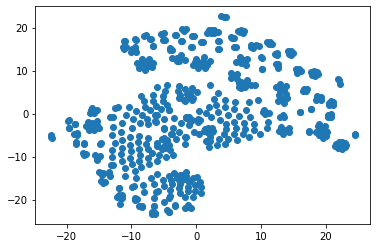

In [22]:
#Visualize the plot 

plt.scatter(df_tsne['x'], df_tsne['y'])
plt.show()

In [26]:
#Find best value for k for loop

inertia = []

k=list(range(1,11))

for i in k:
    km = KM(n_clusters=i, random_state=0)
    km.fit(df_tsne)
    inertia.append(km.inertia_)
    


C:\Users\Steph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


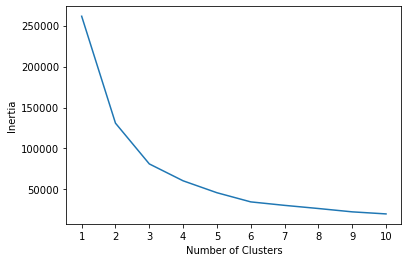

In [27]:
#Find best value for k elbow curve 

#dreating dataframe for plot
elbow_data = {"k":k, "inertia":inertia}
df_elbow = pd.DataFrame(elbow_data)

#Plot

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel("Inertia")
plt.show()



In [ ]:
#Based on this Data we will be able to cluster the cryptocurrencies together. 
#the recommended number of clusters to use would be three based on the elbow plot above. 